# Brownian Motion: A Numerical Experiment

Suppose we want to describe the motion of a particle in a gas:

![Brownian motion](brownian-motion.gif)

* We could model all those little particles and their collisions.

* Model the motion of the big particle as random. 

* *Assume* the particle gets a 'bump' in X and Y that is uniformly distributed between $-0.1$ and $0.1$.

Draw 10,000 random numbers modeling the bumps, print them, store them in the array `bumps`.

In [2]:
from random import uniform

bumps = []
for i in range(10000):
    b = uniform(-0.1, 0.1)
    bumps.append(b)

Plot a histogram to confirm the distribution of the bumps:

(array([ 1006.,  1021.,   960.,   996.,  1056.,  1017.,   976.,   986.,
         1000.,   982.]),
 array([ -9.99919044e-02,  -7.99948511e-02,  -5.99977978e-02,
         -4.00007445e-02,  -2.00036913e-02,  -6.63797718e-06,
          1.99904153e-02,   3.99874686e-02,   5.99845219e-02,
          7.99815751e-02,   9.99786284e-02]),
 <a list of 10 Patch objects>)

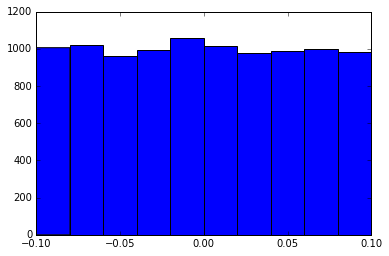

In [3]:
import matplotlib.pyplot as pt
pt.hist(bumps)

**Question 1:** Where does the particle end up, on average?

**Question 2:** How does the average distance from the origin depend on the time?

**Approach:** Sum the bumps.

In [4]:
sum(bumps)

-3.0897944581411325

How did it get there?

Plot the path.

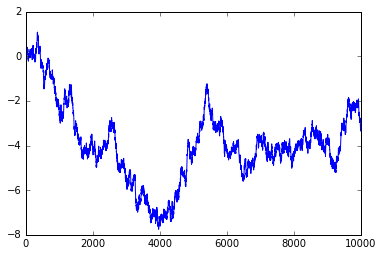

In [5]:
pos = 0
path = []
for bump in bumps:
    path.append(pos)
    pos += bump
path.append(pos)

pt.plot(path)

Individual realizations: not that helpful.

Do 1000 of these. Store the endpoints in `endpoints`.

In [9]:
from random import normalvariate

endpoints = []

for realization in range(1000):
    bumps = []
    for i in range(10000):
        b = normalvariate(0, 0.1)
        bumps.append(b)

    endpoint = sum(bumps)
    endpoints.append(endpoint)

Plot a histogram of the endpoints:

(array([   3.,   22.,   59.,  152.,  254.,  261.,  157.,   67.,   21.,    4.]),
 array([-34.97767545, -28.09727797, -21.21688049, -14.33648301,
         -7.45608553,  -0.57568805,   6.30470943,  13.18510691,
         20.06550439,  26.94590187,  33.82629935]),
 <a list of 10 Patch objects>)

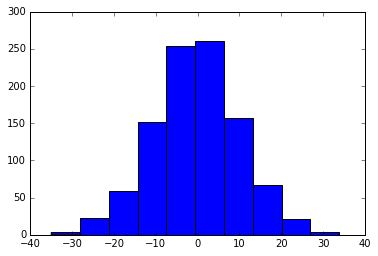

In [7]:
pt.hist(endpoints)

## Answering Question 1

To answer our question 1: What is the *average* endpoint?

In [35]:
sum(endpoints)/len(endpoints)

0.03684222340619225

But we got even more information:

*   It looks like the endpoints follow a [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution).
*   Is this result robust with respect to distribution choice? (We somewhat arbitrarily chose 'uniform'.)

## Answering Question 2

Let's compute the average distance from the origin based on the length of the simulation.

In [24]:

from random import normalvariate

avg_dists = []
for nsteps in range(0, 1500, 100):
    print(nsteps, "steps")

    endpoints = []
    for realization in range(1000):
        bumps = []
        for i in range(nsteps):
            b = normalvariate(0, 0.1)
            bumps.append(b)

        endpoint = sum(bumps)
        endpoints.append(endpoint)
        
    avg_dists.append(sum(ep**2 for ep in endpoints) / len(endpoints))

0 steps
100 steps
200 steps
300 steps
400 steps
500 steps
600 steps
700 steps
800 steps
900 steps
1000 steps
1100 steps
1200 steps
1300 steps
1400 steps


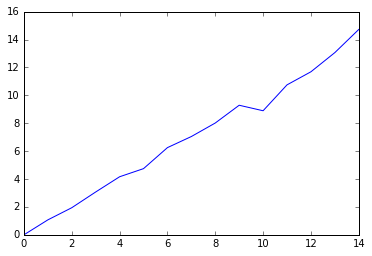

In [25]:
pt.plot(avg_dists)

Got a hypothesis?